In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Лабораторная работа: Различение двух простых гипотез


В данной работе рассматривается задача различения двух простых гипотез:
- **H₀**: θ = θ₀ (основная гипотеза)
- **H₁**: θ = θ₁ (альтернативная гипотеза)

где θ - параметр распределения, принимающий только два известных значения.

In [29]:
# Параметры для задачи 1 (Параметры нормального распределения)
m0 = 0      # математическое ожидание при гипотезе H0
m1 = 2      # математическое ожидание при гипотезе H1
sigma = 2   # стандартное отклонение (известно)
sigma2 = sigma**2  # дисперсия

# Параметры экспериментов
n = 100     # объем выборки
l = 10      # количество реализаций

# Параметры критериев
a0 = 5      # коэффициент для байесовского критерия
b0 = 1      # коэффициент для байесовского критерия
alpha_fixed = 0.05  # уровень значимости для наиболее мощного критерия

print("Параметры задачи 1 (нормальное распределение):")
print(f"H₀: m = {m0}, H₁: m = {m1}, σ = {sigma}")
print(f"Объем выборки: n = {n}, реализаций: l = {l}")

Параметры задачи 1 (нормальное распределение):
H₀: m = 0, H₁: m = 2, σ = 2
Объем выборки: n = 100, реализаций: l = 10


### Задача 1: Нормальное распределение с фиксированным объемом выборки

**Теоретическое обоснование:**

Для нормального распределения N(m, σ²) с известной дисперсией:

Функция правдоподобия:
`L(x|m) = (1/(2πσ²)^(n/2)) * exp(-1/(2σ²) * Σ(xᵢ - m)²)`

Отношение правдоподобия:
`G(x) = L(x|m₁) / L(x|m₀) = exp((m₁-m₀)/σ² * Σxᵢ - n(m₁²-m₀²)/(2σ²))`

Логарифм отношения правдоподобия:
`ln G(x) = (m₁-m₀)/σ² * Σxᵢ - n(m₁²-m₀²)/(2σ²)`

Статистика критерия: **выборочное среднее X̄**

In [30]:
# Расчет порогов для различных критериев (нормальное распределение)

# Пороги для выборочного среднего

# Минимаксный критерий: α(h_m) = β(h_m)
h_m_mean = (m0 + m1) / 2
print(f"Минимаксный критерий: порог для X̄ = {h_m_mean:.4f}")

# Байесовский критерий: h_b = a0/b0
h_b = a0 / b0
h_b_mean = (m0 + m1) / 2 + (sigma2 * np.log(h_b)) / (n * (m1 - m0))
print(f"Байесовский критерий: порог для X̄ = {h_b_mean:.4f}")

# Наиболее мощный критерий: α(h_alpha) = alpha
z_alpha = stats.norm.ppf(1 - alpha_fixed)
h_alpha_mean = m0 + z_alpha * sigma / np.sqrt(n)
print(f"Наиболее мощный критерий: порог для X̄ = {h_alpha_mean:.4f}")

Минимаксный критерий: порог для X̄ = 1.0000
Байесовский критерий: порог для X̄ = 1.0322
Наиболее мощный критерий: порог для X̄ = 0.3290


### Объяснение критериев:

1. **Минимаксный критерий**: минимизирует максимальную из ошибок
   - Порог находится посередине между m₀ и m₁

2. **Байесовский критерий**: минимизирует средние потери
   - Порог зависит от коэффициентов a₀ и b₀

3. **Наиболее мощный критерий**: минимизирует β при фиксированном α
   - Порог определяется квантилем нормального распределения

In [31]:
# Функции для расчета вероятностей ошибок

def calculate_error_probabilities(threshold, m_true, m0, m1, sigma, n):
    """
    Расчет вероятностей ошибок для нормального распределения
    """
    std_error = sigma / np.sqrt(n)  # стандартная ошибка среднего
    
    if m_true == m0:
        # Если верна H0, то ошибка 1 рода - отклонить H0 когда она верна
        alpha_prob = 1 - stats.norm.cdf(threshold, loc=m0, scale=std_error)
        return alpha_prob, None
    else:
        # Если верна H1, то ошибка 2 рода - принять H0 когда верна H1
        beta_prob = stats.norm.cdf(threshold, loc=m1, scale=std_error)
        return None, beta_prob

# Расчет вероятностей ошибок для каждого критерия
print("Теоретические вероятности ошибок:")
print("Минимаксный критерий:")
alpha_m, _ = calculate_error_probabilities(h_m_mean, m0, m0, m1, sigma, n)
_, beta_m = calculate_error_probabilities(h_m_mean, m1, m0, m1, sigma, n)
print(f"  α = {alpha_m:.4f}, β = {beta_m:.4f}")

print("Байесовский критерий:")
alpha_b, _ = calculate_error_probabilities(h_b_mean, m0, m0, m1, sigma, n)
_, beta_b = calculate_error_probabilities(h_b_mean, m1, m0, m1, sigma, n)
print(f"  α = {alpha_b:.4f}, β = {beta_b:.4f}")

print("Наиболее мощный критерий:")
alpha_p, _ = calculate_error_probabilities(h_alpha_mean, m0, m0, m1, sigma, n)
_, beta_p = calculate_error_probabilities(h_alpha_mean, m1, m0, m1, sigma, n)
print(f"  α = {alpha_p:.4f}, β = {beta_p:.4f}")

Теоретические вероятности ошибок:
Минимаксный критерий:
  α = 0.0000, β = 0.0000
Байесовский критерий:
  α = 0.0000, β = 0.0000
Наиболее мощный критерий:
  α = 0.0500, β = 0.0000


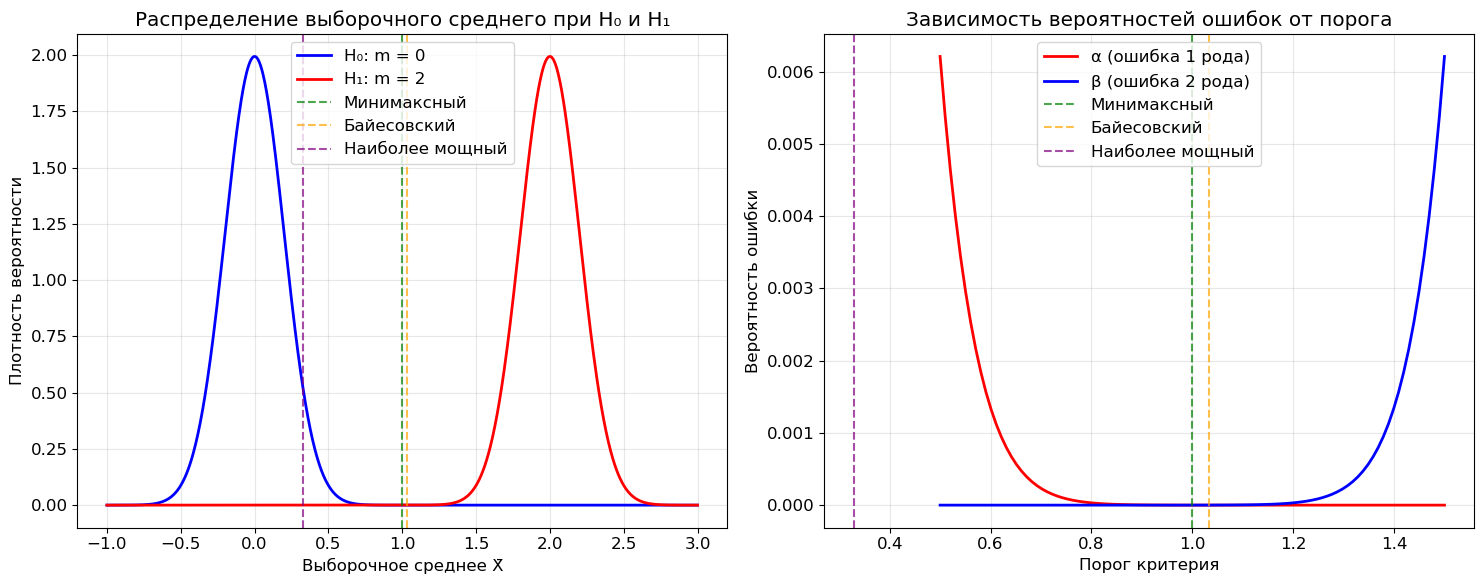

In [32]:
# Визуализация плотностей распределения и порогов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Левая панель: распределение выборочного среднего при H0 и H1
x = np.linspace(-1, 3, 1000)
std_error = sigma / np.sqrt(n)

# Плотности распределения выборочного среднего
pdf_h0 = stats.norm.pdf(x, loc=m0, scale=std_error)
pdf_h1 = stats.norm.pdf(x, loc=m1, scale=std_error)

ax1.plot(x, pdf_h0, 'b-', linewidth=2, label=f'H₀: m = {m0}')
ax1.plot(x, pdf_h1, 'r-', linewidth=2, label=f'H₁: m = {m1}')

# Вертикальные линии - пороги критериев
ax1.axvline(h_m_mean, color='green', linestyle='--', alpha=0.7, label='Минимаксный')
ax1.axvline(h_b_mean, color='orange', linestyle='--', alpha=0.7, label='Байесовский')
ax1.axvline(h_alpha_mean, color='purple', linestyle='--', alpha=0.7, label='Наиболее мощный')

ax1.set_xlabel('Выборочное среднее X̄')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('Распределение выборочного среднего при H₀ и H₁')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Правая панель: вероятности ошибок для разных порогов
thresholds = np.linspace(0.5, 1.5, 100)
alpha_vals = 1 - stats.norm.cdf(thresholds, loc=m0, scale=std_error)
beta_vals = stats.norm.cdf(thresholds, loc=m1, scale=std_error)

ax2.plot(thresholds, alpha_vals, 'r-', linewidth=2, label='α (ошибка 1 рода)')
ax2.plot(thresholds, beta_vals, 'b-', linewidth=2, label='β (ошибка 2 рода)')

# Отметим пороги критериев
ax2.axvline(h_m_mean, color='green', linestyle='--', alpha=0.7, label='Минимаксный')
ax2.axvline(h_b_mean, color='orange', linestyle='--', alpha=0.7, label='Байесовский')
ax2.axvline(h_alpha_mean, color='purple', linestyle='--', alpha=0.7, label='Наиболее мощный')

ax2.set_xlabel('Порог критерия')
ax2.set_ylabel('Вероятность ошибки')
ax2.set_title('Зависимость вероятностей ошибок от порога')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
# Функции проверки гипотез для различных критериев

def minimax_test(sample, threshold):
    """Минимаксный критерий"""
    sample_mean = np.mean(sample)
    # H0: m = m0 отвергается если X̄ > порога
    return sample_mean > threshold

def bayesian_test(sample, threshold):
    """Байесовский критерий"""
    sample_mean = np.mean(sample)
    # H0: m = m0 отвергается если X̄ > порога
    return sample_mean > threshold

def most_powerful_test(sample, threshold):
    """Наиболее мощный критерий"""
    sample_mean = np.mean(sample)
    # H0: m = m0 отвергается если X̄ > порога
    return sample_mean > threshold

In [34]:
# Эксперимент 1 - данные из N(0,4), проверка H0: m=0

print("ЭКСПЕРИМЕНТ 1: данные из N(0,4), проверка H0: m=0")
print("=" * 50)

np.random.seed(42)  # для воспроизводимости результатов

# Счетчики отклонения H0 для каждого критерия
reject_minimax_1 = 0
reject_bayesian_1 = 0
reject_powerful_1 = 0

sample_means_1 = []  

print("Реализации выборок и результаты проверки:")
print("№ | X̄      | Мин. | Байес | Мощн.")
print("-" * 40)

for i in range(l):
    # Генерация выборки из N(0,4)
    sample = np.random.normal(m0, sigma, n)
    sample_mean = np.mean(sample)
    sample_means_1.append(sample_mean)
    
    # Проверка гипотез разными критериями
    result_minimax = minimax_test(sample, h_m_mean)
    result_bayesian = bayesian_test(sample, h_b_mean)
    result_powerful = most_powerful_test(sample, h_alpha_mean)
    
    # Подсчет отклонений H0
    reject_minimax_1 += int(result_minimax)
    reject_bayesian_1 += int(result_bayesian)
    reject_powerful_1 += int(result_powerful)
    
    print(f"{i+1:2} | {sample_mean:6.3f} | {'✓' if result_minimax else '✗':5} | {'✓' if result_bayesian else '✗':6} | {'✓' if result_powerful else '✗':5}")

print("\nКоличество отклонений H0 (ошибки 1 рода):")
print(f"Минимаксный критерий: {reject_minimax_1}/{l} = {reject_minimax_1/l:.3f}")
print(f"Байесовский критерий: {reject_bayesian_1}/{l} = {reject_bayesian_1/l:.3f}")
print(f"Наиболее мощный критерий: {reject_powerful_1}/{l} = {reject_powerful_1/l:.3f}")

ЭКСПЕРИМЕНТ 1: данные из N(0,4), проверка H0: m=0
Реализации выборок и результаты проверки:
№ | X̄      | Мин. | Байес | Мощн.
----------------------------------------
 1 | -0.208 | ✗     | ✗      | ✗    
 2 |  0.045 | ✗     | ✗      | ✗    
 3 |  0.130 | ✗     | ✗      | ✗    
 4 |  0.214 | ✗     | ✗      | ✗    
 5 | -0.112 | ✗     | ✗      | ✗    
 6 | -0.231 | ✗     | ✗      | ✗    
 7 |  0.048 | ✗     | ✗      | ✗    
 8 | -0.012 | ✗     | ✗      | ✗    
 9 |  0.457 | ✗     | ✗      | ✓    
10 |  0.056 | ✗     | ✗      | ✗    

Количество отклонений H0 (ошибки 1 рода):
Минимаксный критерий: 0/10 = 0.000
Байесовский критерий: 0/10 = 0.000
Наиболее мощный критерий: 1/10 = 0.100


In [35]:
# Эксперимент 2 - данные из N(2,4), проверка H0: m=0

print("\nЭКСПЕРИМЕНТ 2: данные из N(2,4), проверка H0: m=0")
print("=" * 50)

# Счетчики принятия H0 (ошибки 2 рода) для каждого критерия
accept_minimax_2 = 0
accept_bayesian_2 = 0
accept_powerful_2 = 0

sample_means_2 = []  # для хранения выборочных средних

print("Реализации выборок и результаты проверки:")
print("№ | X̄      | Мин. | Байес | Мощн.")
print("-" * 40)

for i in range(l):
    # Генерация выборки из N(2,4)
    sample = np.random.normal(m1, sigma, n)
    sample_mean = np.mean(sample)
    sample_means_2.append(sample_mean)
    
    # Проверка гипотез разными критериями
    result_minimax = minimax_test(sample, h_m_mean)
    result_bayesian = bayesian_test(sample, h_b_mean)
    result_powerful = most_powerful_test(sample, h_alpha_mean)
    
    # Подсчет принятий H0 (когда должна быть отвергнута)
    accept_minimax_2 += int(not result_minimax)
    accept_bayesian_2 += int(not result_bayesian)
    accept_powerful_2 += int(not result_powerful)
    
    print(f"{i+1:2} | {sample_mean:6.3f} | {'✓' if result_minimax else '✗':5} | {'✓' if result_bayesian else '✗':6} | {'✓' if result_powerful else '✗':5}")

print("\nКоличество принятий H0 (ошибки 2 рода):")
print(f"Минимаксный критерий: {accept_minimax_2}/{l} = {accept_minimax_2/l:.3f}")
print(f"Байесовский критерий: {accept_bayesian_2}/{l} = {accept_bayesian_2/l:.3f}")
print(f"Наиболее мощный критерий: {accept_powerful_2}/{l} = {accept_powerful_2/l:.3f}")


ЭКСПЕРИМЕНТ 2: данные из N(2,4), проверка H0: m=0
Реализации выборок и результаты проверки:
№ | X̄      | Мин. | Байес | Мощн.
----------------------------------------
 1 |  2.320 | ✓     | ✓      | ✓    
 2 |  2.214 | ✓     | ✓      | ✓    
 3 |  2.091 | ✓     | ✓      | ✓    
 4 |  1.930 | ✓     | ✓      | ✓    
 5 |  2.529 | ✓     | ✓      | ✓    
 6 |  1.802 | ✓     | ✓      | ✓    
 7 |  2.330 | ✓     | ✓      | ✓    
 8 |  2.125 | ✓     | ✓      | ✓    
 9 |  1.902 | ✓     | ✓      | ✓    
10 |  2.173 | ✓     | ✓      | ✓    

Количество принятий H0 (ошибки 2 рода):
Минимаксный критерий: 0/10 = 0.000
Байесовский критерий: 0/10 = 0.000
Наиболее мощный критерий: 0/10 = 0.000


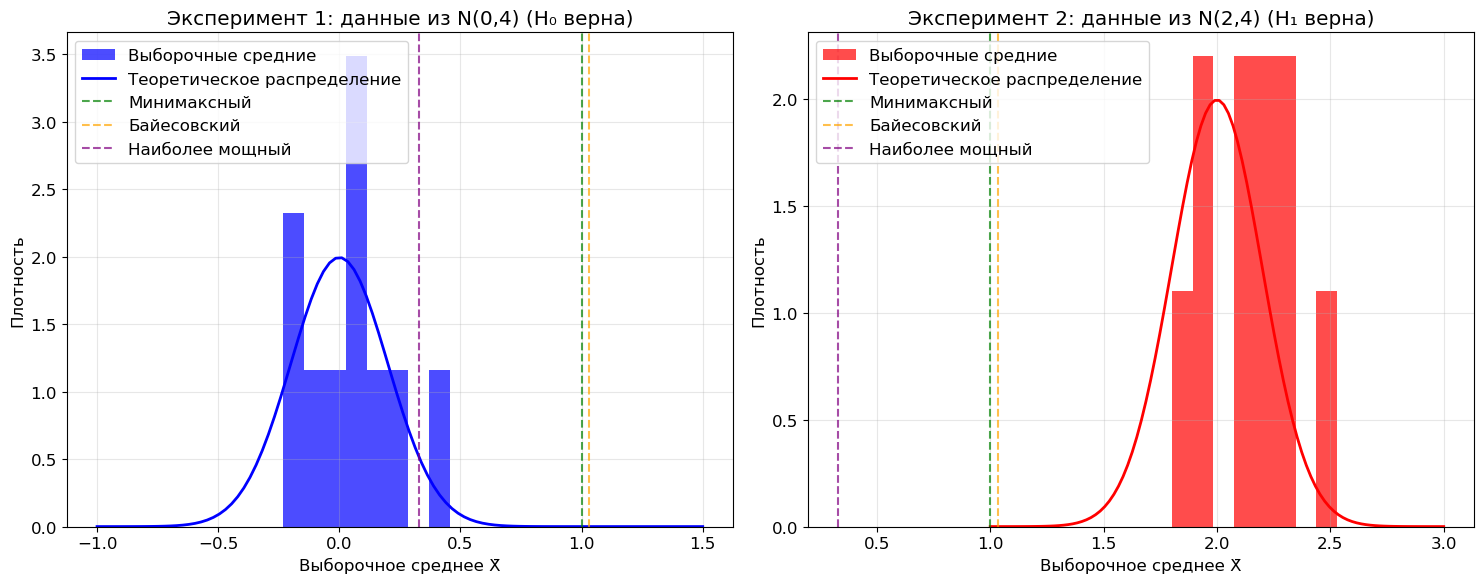

In [36]:
# Визуализация результатов экспериментов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Левая панель: распределение выборочных средних из эксперимента 1
ax1.hist(sample_means_1, bins=8, alpha=0.7, color='blue', density=True, label='Выборочные средние')
x = np.linspace(-1, 1.5, 100)
pdf_h0 = stats.norm.pdf(x, loc=m0, scale=sigma/np.sqrt(n))
ax1.plot(x, pdf_h0, 'b-', linewidth=2, label='Теоретическое распределение')

# Пороги
ax1.axvline(h_m_mean, color='green', linestyle='--', alpha=0.7, label='Минимаксный')
ax1.axvline(h_b_mean, color='orange', linestyle='--', alpha=0.7, label='Байесовский')
ax1.axvline(h_alpha_mean, color='purple', linestyle='--', alpha=0.7, label='Наиболее мощный')

ax1.set_xlabel('Выборочное среднее X̄')
ax1.set_ylabel('Плотность')
ax1.set_title('Эксперимент 1: данные из N(0,4) (H₀ верна)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Правая панель: распределение выборочных средних из эксперимента 2
ax2.hist(sample_means_2, bins=8, alpha=0.7, color='red', density=True, label='Выборочные средние')
x = np.linspace(1, 3, 100)
pdf_h1 = stats.norm.pdf(x, loc=m1, scale=sigma/np.sqrt(n))
ax2.plot(x, pdf_h1, 'r-', linewidth=2, label='Теоретическое распределение')

# Пороги
ax2.axvline(h_m_mean, color='green', linestyle='--', alpha=0.7, label='Минимаксный')
ax2.axvline(h_b_mean, color='orange', linestyle='--', alpha=0.7, label='Байесовский')
ax2.axvline(h_alpha_mean, color='purple', linestyle='--', alpha=0.7, label='Наиболее мощный')

ax2.set_xlabel('Выборочное среднее X̄')
ax2.set_ylabel('Плотность')
ax2.set_title('Эксперимент 2: данные из N(2,4) (H₁ верна)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задача 2: Показательное распределение с последовательным критерием

### Теоретическое обоснование:

Для показательного распределения E(θ):

Функция плотности вероятности:  
`f(x|θ) = θ * exp(-θ*x)` для x ≥ 0

Отношение правдоподобия для одного наблюдения:
`G(x) = f(x|θ₁) / f(x|θ₀) = (θ₁/θ₀) * exp(-(θ₁-θ₀)*x)`

Для последовательности наблюдений:
`G(x₁,...,xₙ) = ∏ G(xᵢ) = (θ₁/θ₀)ⁿ * exp(-(θ₁-θ₀) * Σxᵢ)`

**Границы ПКОВ:**
- Нижняя граница: `A₀ = β/(1-α)`
- Верхняя граница: `A₁ = (1-β)/α`

**Правило принятия решения:**
1. Если `G ≤ A₀` → принимаем H₀
2. Если `G ≥ A₁` → принимаем H₁  
3. Если `A₀ < G < A₁` → продолжаем наблюдения

In [37]:
# Параметры для задачи 2 (показательное распределение)

# Параметры показательного распределения
theta0 = 1.0    # параметр при гипотезе H0
theta1 = 2.0    # параметр при гипотезе H1

# Параметры последовательного критерия
alpha_seq = 0.05  # вероятность ошибки 1 рода
beta_seq = 0.03   # вероятность ошибки 2 рода

# Границы для ПКОВ
A0 = beta_seq / (1 - alpha_seq)      # нижняя граница
A1 = (1 - beta_seq) / alpha_seq      # верхняя граница

l_seq = 20  # количество реализаций

print("Параметры задачи 2 (показательное распределение):")
print(f"H₀: θ = {theta0}, H₁: θ = {theta1}")
print(f"α = {alpha_seq}, β = {beta_seq}")
print(f"Границы ПКОВ: A₀ = {A0:.4f}, A₁ = {A1:.4f}")

Параметры задачи 2 (показательное распределение):
H₀: θ = 1.0, H₁: θ = 2.0
α = 0.05, β = 0.03
Границы ПКОВ: A₀ = 0.0316, A₁ = 19.4000


In [38]:
# Реализация ПКОВ для показательного распределения

def sequential_probability_ratio_test(data_generator, theta0, theta1, A0, A1, max_steps=1000):
    """
    Последовательный критерий отношения правдоподобия для показательного распределения
    
    Parameters:
    data_generator - функция генерации данных
    theta0, theta1 - параметры распределения при H0 и H1
    A0, A1 - границы критерия
    max_steps - максимальное количество шагов
    
    Returns:
    decision - решение: 0 (H0), 1 (H1)
    steps - количество шагов до остановки
    likelihood_ratio - траектория отношения правдоподобия
    observations - список наблюдений
    """
    
    likelihood_ratio = [1.0]  # начальное значение отношения правдоподобия
    steps = 0
    observations = []
    
    for i in range(max_steps):
        # Генерация нового наблюдения
        x = data_generator()
        observations.append(x)
        steps += 1
        
        # Отношение правдоподобия для показательного распределения
        # f(x|theta1)/f(x|theta0) = (theta1/theta0) * exp(-(theta1-theta0)*x)
        current_ratio = (theta1 / theta0) * np.exp(-(theta1 - theta0) * x)
        
        # Обновление общего отношения правдоподобия
        new_ratio = likelihood_ratio[-1] * current_ratio
        likelihood_ratio.append(new_ratio)
        
        # Проверка границ
        if new_ratio <= A0:
            return 0, steps, likelihood_ratio, observations  # Принимаем H0
        elif new_ratio >= A1:
            return 1, steps, likelihood_ratio, observations  # Принимаем H1
    
    # Если достигнуто максимальное количество шагов
    # Принимаем решение на основе последнего значения
    if likelihood_ratio[-1] <= (A0 + A1) / 2:
        return 0, steps, likelihood_ratio, observations
    else:
        return 1, steps, likelihood_ratio, observations

In [39]:
# Расчет теоретических средних количеств шагов

def calculate_expected_steps(theta0, theta1, alpha, beta):
    """
    Расчет приближенного среднего количества шадов для ПКОВ
    """
    # Математическое ожидание логарифма отношения правдоподобия при H0
    def K(theta_true):
        # K = E[ln(f(x|theta1)/f(x|theta0))]
        # Для показательного распределения:
        # ln(f(x|theta1)/f(x|theta0)) = ln(theta1/theta0) - (theta1-theta0)*x
        # E[x] = 1/theta_true
        return np.log(theta1/theta0) - (theta1 - theta0) / theta_true
    
    K0 = K(theta0)  # при H0
    K1 = K(theta1)  # при H1
    
    # Приближенные формулы для среднего количества шагов
    M0 = (beta * np.log(beta/(1-alpha)) + (1-beta) * np.log((1-beta)/alpha)) / K0
    M1 = ((1-alpha) * np.log(beta/(1-alpha)) + alpha * np.log((1-beta)/alpha)) / K1
    
    return M0, M1

# Расчет теоретических значений
M0_theoretical, M1_theoretical = calculate_expected_steps(theta0, theta1, alpha_seq, beta_seq)

print("Теоретические средние количества шагов:")
print(f"При H₀ верна: M₀ = {M0_theoretical:.2f} шагов")
print(f"При H₁ верна: M₁ = {M1_theoretical:.2f} шагов")

Теоретические средние количества шагов:
При H₀ верна: M₀ = -9.04 шагов
При H₁ верна: M₁ = -16.23 шагов


In [40]:
# Эксперимент 2.1 - данные из E(1), проверка H0: θ=1

print("ЭКСПЕРИМЕНТ 2.1: данные из E(1), проверка H0: θ=1")
print("=" * 50)

np.random.seed(123)  # для воспроизводимости

# Счетчики
reject_H0_count = 0  # счетчик отклонений H0 (ошибки 1 рода)
steps_H0 = []        # количество шагов для каждой реализации
decisions_H0 = []    # решения для каждой реализации
all_trajectories_H0 = []  # траектории для визуализации

print("Реализации при H₀ верна (θ = 1.0):")
print("№ | Решение | Шаги | Final LR")
print("-" * 35)

for i in range(l_seq):
    # Генератор данных из E(1) - H0 верна
    def data_generator_H0():
        return np.random.exponential(1/theta0)
    
    # Применение ПКОВ
    decision, steps, lr_trajectory, observations = sequential_probability_ratio_test(
        data_generator_H0, theta0, theta1, A0, A1, max_steps=1000)
    
    steps_H0.append(steps)
    decisions_H0.append(decision)
    reject_H0_count += decision  # decision=1 означает отклонение H0
    all_trajectories_H0.append(lr_trajectory)
    
    print(f"{i+1:2} | {'H₁' if decision else 'H₀':6} | {steps:5} | {lr_trajectory[-1]:8.4f}")

print(f"\nКоличество отклонений H₀ (ошибки 1 рода): {reject_H0_count}/{l_seq} = {reject_H0_count/l_seq:.3f}")
print(f"Среднее количество шагов: {np.mean(steps_H0):.2f} (теоретическое: {M0_theoretical:.2f})")

ЭКСПЕРИМЕНТ 2.1: данные из E(1), проверка H0: θ=1
Реализации при H₀ верна (θ = 1.0):
№ | Решение | Шаги | Final LR
-----------------------------------
 1 | H₀     |     7 |   0.0300
 2 | H₀     |    32 |   0.0266
 3 | H₀     |     9 |   0.0254
 4 | H₀     |    16 |   0.0291
 5 | H₀     |    22 |   0.0104
 6 | H₀     |     6 |   0.0225
 7 | H₀     |    28 |   0.0101
 8 | H₀     |     6 |   0.0026
 9 | H₀     |     9 |   0.0039
10 | H₀     |    23 |   0.0270
11 | H₀     |    11 |   0.0169
12 | H₀     |     6 |   0.0141
13 | H₀     |    29 |   0.0103
14 | H₀     |    18 |   0.0037
15 | H₀     |    16 |   0.0074
16 | H₀     |     9 |   0.0059
17 | H₀     |     9 |   0.0265
18 | H₀     |     7 |   0.0139
19 | H₁     |    10 |  30.7553
20 | H₀     |    15 |   0.0182

Количество отклонений H₀ (ошибки 1 рода): 1/20 = 0.050
Среднее количество шагов: 14.40 (теоретическое: -9.04)


In [41]:
# Эксперимент 2.2 - данные из E(2), проверка H0: θ=1

print("\nЭКСПЕРИМЕНТ 2.2: данные из E(2), проверка H0: θ=1")
print("=" * 50)

# Счетчики
accept_H0_count = 0  # счетчик принятий H0 (ошибки 2 рода)
steps_H1 = []        # количество шагов для каждой реализации
decisions_H1 = []    # решения для каждой реализации
all_trajectories_H1 = []  # траектории для визуализации

print("Реализации при H₁ верна (θ = 2.0):")
print("№ | Решение | Шаги | Final LR")
print("-" * 35)

for i in range(l_seq):
    # Генератор данных из E(2) - H1 верна
    def data_generator_H1():
        return np.random.exponential(1/theta1)
    
    # Применение ПКОВ
    decision, steps, lr_trajectory, observations = sequential_probability_ratio_test(
        data_generator_H1, theta0, theta1, A0, A1, max_steps=1000)
    
    steps_H1.append(steps)
    decisions_H1.append(decision)
    accept_H0_count += (1 - decision)  # decision=0 означает принятие H0 (ошибка)
    all_trajectories_H1.append(lr_trajectory)
    
    print(f"{i+1:2} | {'H₁' if decision else 'H₀':6} | {steps:5} | {lr_trajectory[-1]:8.4f}")

print(f"\nКоличество принятий H₀ (ошибки 2 рода): {accept_H0_count}/{l_seq} = {accept_H0_count/l_seq:.3f}")
print(f"Среднее количество шагов: {np.mean(steps_H1):.2f} (теоретическое: {M1_theoretical:.2f})")


ЭКСПЕРИМЕНТ 2.2: данные из E(2), проверка H0: θ=1
Реализации при H₁ верна (θ = 2.0):
№ | Решение | Шаги | Final LR
-----------------------------------
 1 | H₁     |    22 |  27.5763
 2 | H₁     |    16 |  27.4403
 3 | H₁     |    20 |  20.4933
 4 | H₁     |    12 |  19.6498
 5 | H₁     |     9 |  22.0190
 6 | H₁     |    20 |  25.7180
 7 | H₁     |    10 |  20.0570
 8 | H₁     |    13 |  24.2952
 9 | H₁     |    11 |  19.4155
10 | H₁     |    21 |  21.4468
11 | H₁     |    15 |  20.5496
12 | H₁     |    13 |  22.7713
13 | H₁     |    16 |  23.3509
14 | H₁     |    41 |  22.7307
15 | H₁     |    14 |  25.6640
16 | H₁     |    12 |  22.9875
17 | H₁     |     9 |  25.1017
18 | H₁     |    11 |  25.7299
19 | H₁     |    26 |  26.8704
20 | H₁     |    14 |  27.2529

Количество принятий H₀ (ошибки 2 рода): 0/20 = 0.000
Среднее количество шагов: 16.25 (теоретическое: -16.23)


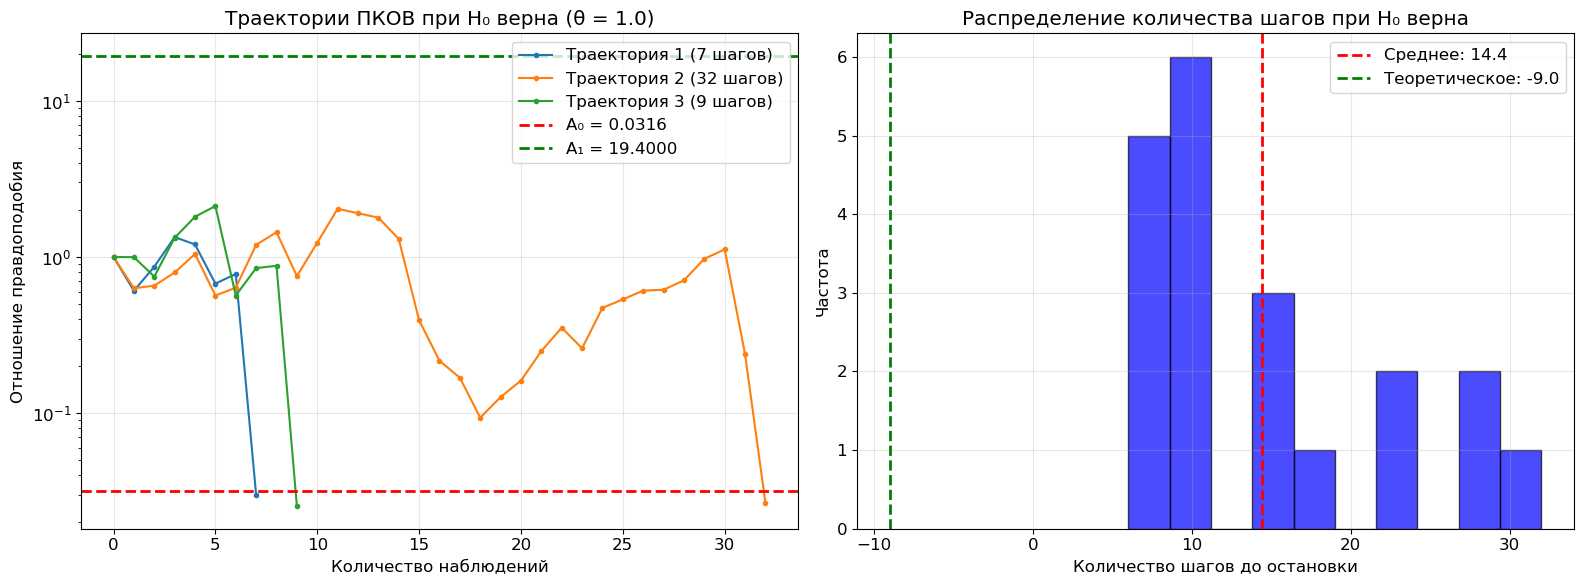

In [42]:
# Визуализация траекторий отношения правдоподобия (H0 верна)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Левая панель: траектории при H0 верна
selected_trajectories_H0 = all_trajectories_H0[:3]  # первые 3 траектории

for i, trajectory in enumerate(selected_trajectories_H0):
    steps = len(trajectory) - 1
    ax1.plot(range(steps + 1), trajectory, marker='o', markersize=3, 
             label=f'Траектория {i+1} ({steps} шагов)')

# Горизонтальные линии - границы
ax1.axhline(y=A0, color='red', linestyle='--', linewidth=2, label=f'A₀ = {A0:.4f}')
ax1.axhline(y=A1, color='green', linestyle='--', linewidth=2, label=f'A₁ = {A1:.4f}')

ax1.set_xlabel('Количество наблюдений')
ax1.set_ylabel('Отношение правдоподобия')
ax1.set_title('Траектории ПКОВ при H₀ верна (θ = 1.0)')
ax1.set_yscale('log')  # логарифмическая шкала для лучшей визуализации
ax1.legend()
ax1.grid(True, alpha=0.3)

# Правая панель: распределение количества шагов при H0 верна
ax2.hist(steps_H0, bins=10, alpha=0.7, color='blue', edgecolor='black')
ax2.axvline(np.mean(steps_H0), color='red', linestyle='--', linewidth=2, 
           label=f'Среднее: {np.mean(steps_H0):.1f}')
ax2.axvline(M0_theoretical, color='green', linestyle='--', linewidth=2, 
           label=f'Теоретическое: {M0_theoretical:.1f}')

ax2.set_xlabel('Количество шагов до остановки')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение количества шагов при H₀ верна')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

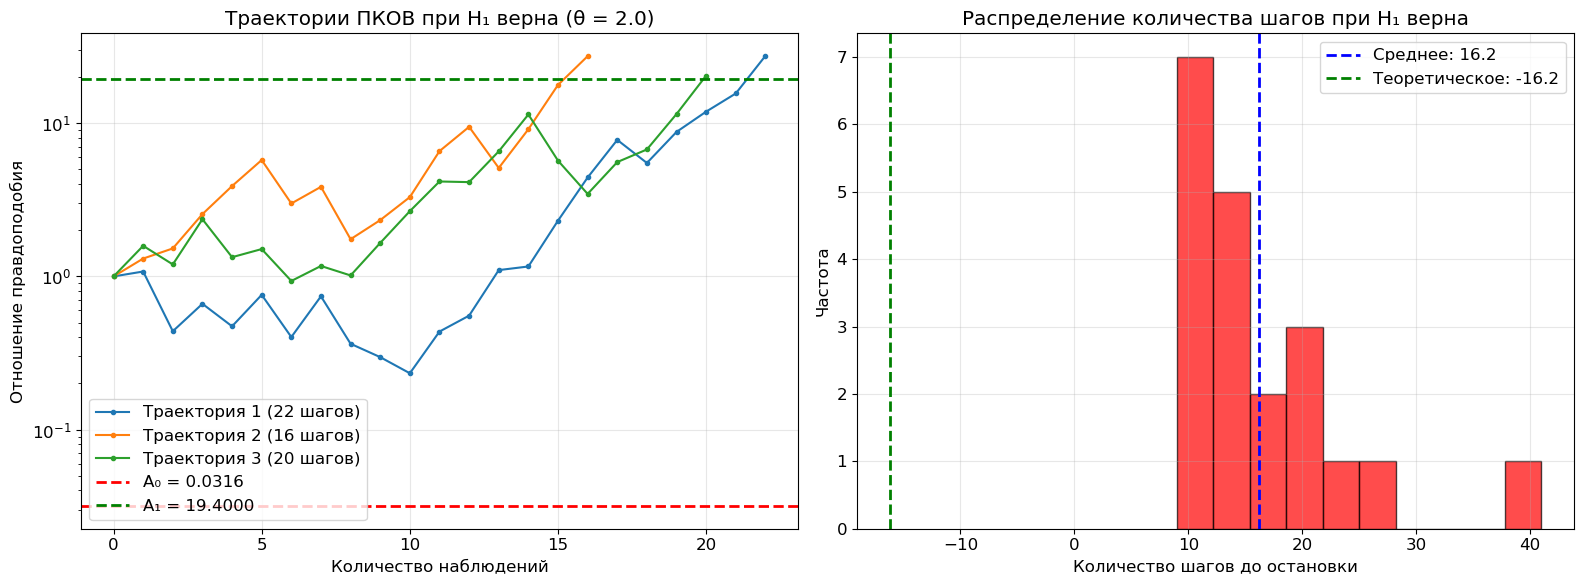

In [43]:
# Визуализация траекторий отношения правдоподобия (H1 верна)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Левая панель: траектории при H1 верна
selected_trajectories_H1 = all_trajectories_H1[:3]  # первые 3 траектории

for i, trajectory in enumerate(selected_trajectories_H1):
    steps = len(trajectory) - 1
    ax1.plot(range(steps + 1), trajectory, marker='o', markersize=3, 
             label=f'Траектория {i+1} ({steps} шагов)')

# Горизонтальные линии - границы
ax1.axhline(y=A0, color='red', linestyle='--', linewidth=2, label=f'A₀ = {A0:.4f}')
ax1.axhline(y=A1, color='green', linestyle='--', linewidth=2, label=f'A₁ = {A1:.4f}')

ax1.set_xlabel('Количество наблюдений')
ax1.set_ylabel('Отношение правдоподобия')
ax1.set_title('Траектории ПКОВ при H₁ верна (θ = 2.0)')
ax1.set_yscale('log')  # логарифмическая шкала для лучшей визуализации
ax1.legend()
ax1.grid(True, alpha=0.3)

# Правая панель: распределение количества шагов при H1 верна
ax2.hist(steps_H1, bins=10, alpha=0.7, color='red', edgecolor='black')
ax2.axvline(np.mean(steps_H1), color='blue', linestyle='--', linewidth=2, 
           label=f'Среднее: {np.mean(steps_H1):.1f}')
ax2.axvline(M1_theoretical, color='green', linestyle='--', linewidth=2, 
           label=f'Теоретическое: {M1_theoretical:.1f}')

ax2.set_xlabel('Количество шагов до остановки')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение количества шагов при H₁ верна')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

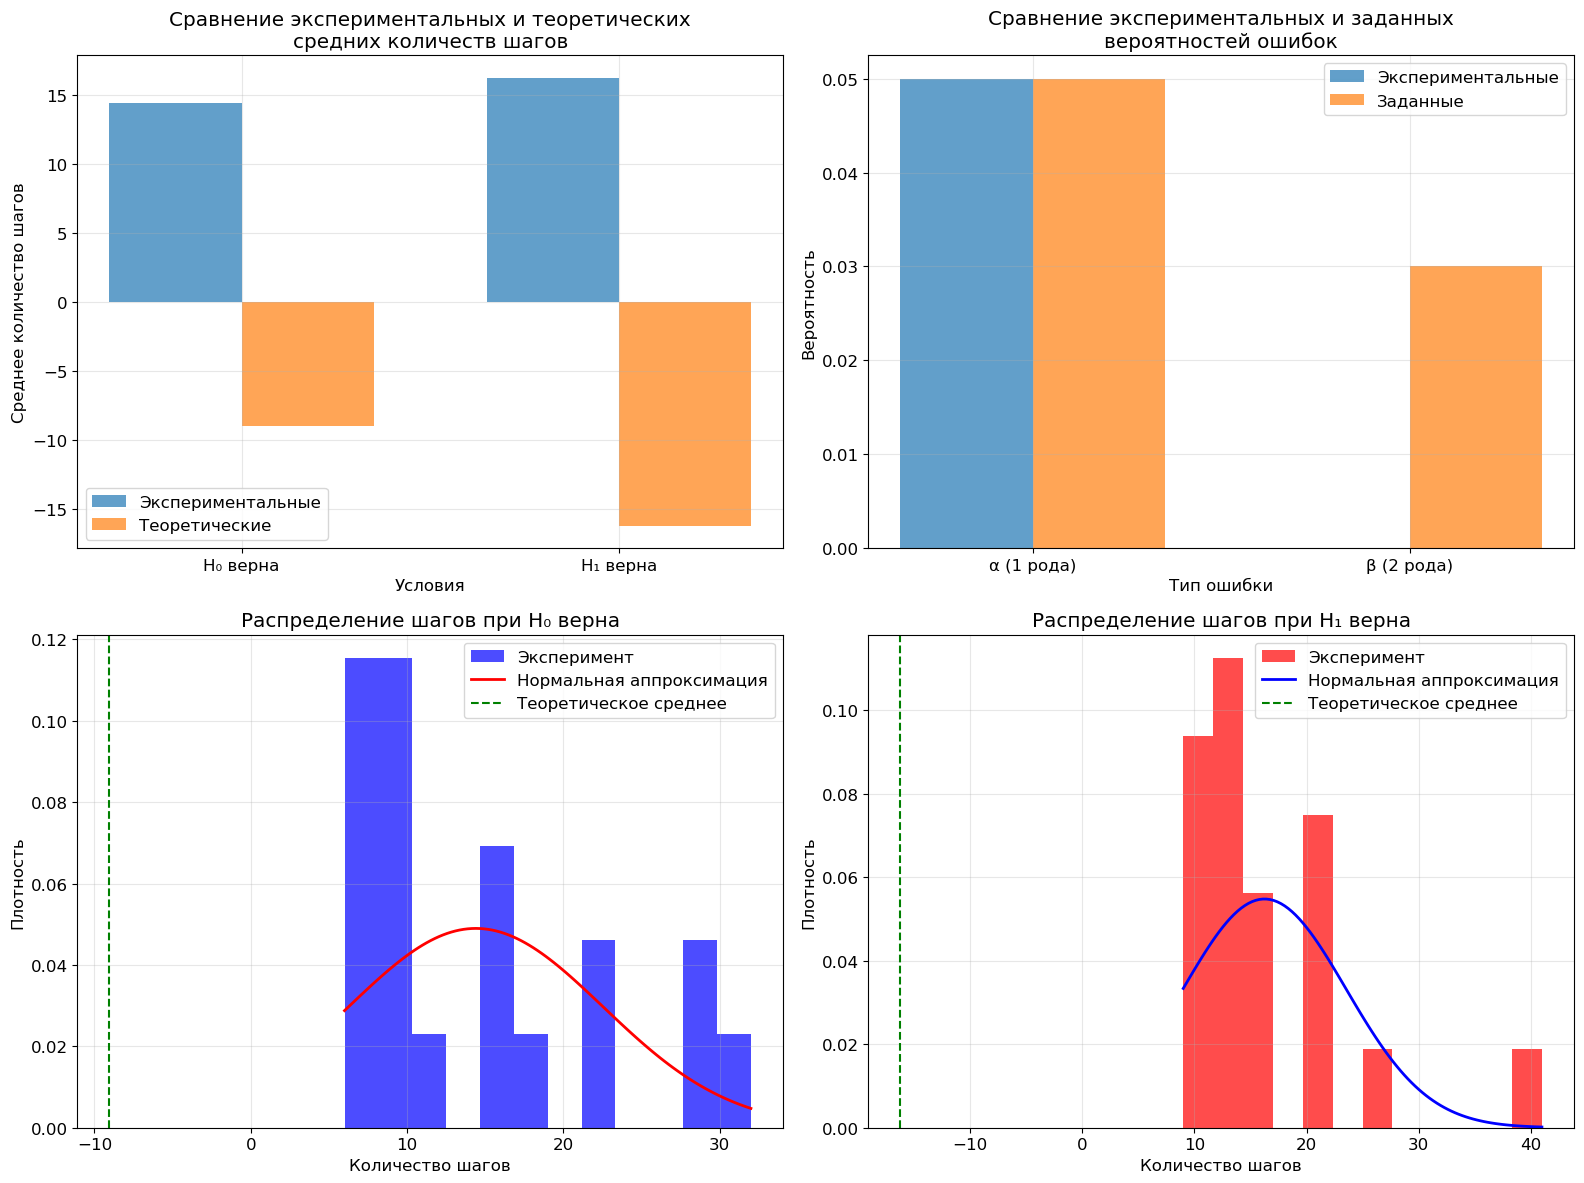

In [44]:
#Сравнительная визуализация всех результатов

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Сравнение количества шагов
criteria = ['H₀ верна', 'H₁ верна']
experimental_steps = [np.mean(steps_H0), np.mean(steps_H1)]
theoretical_steps = [M0_theoretical, M1_theoretical]

x_pos = np.arange(len(criteria))
width = 0.35

ax1.bar(x_pos - width/2, experimental_steps, width, label='Экспериментальные', alpha=0.7)
ax1.bar(x_pos + width/2, theoretical_steps, width, label='Теоретические', alpha=0.7)

ax1.set_xlabel('Условия')
ax1.set_ylabel('Среднее количество шагов')
ax1.set_title('Сравнение экспериментальных и теоретических\nсредних количеств шагов')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(criteria)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Вероятности ошибок
error_rates_exp = [reject_H0_count/l_seq, accept_H0_count/l_seq]
error_rates_theoretical = [alpha_seq, beta_seq]

ax2.bar(x_pos - width/2, error_rates_exp, width, label='Экспериментальные', alpha=0.7)
ax2.bar(x_pos + width/2, error_rates_theoretical, width, label='Заданные', alpha=0.7)

ax2.set_xlabel('Тип ошибки')
ax2.set_ylabel('Вероятность')
ax2.set_title('Сравнение экспериментальных и заданных\nвероятностей ошибок')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['α (1 рода)', 'β (2 рода)'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Распределение шагов при H0
ax3.hist(steps_H0, bins=12, alpha=0.7, color='blue', density=True, label='Эксперимент')
# Теоретическое распределение (аппроксимация нормальным)
if len(steps_H0) > 1:
    x = np.linspace(min(steps_H0), max(steps_H0), 100)
    mu, std = np.mean(steps_H0), np.std(steps_H0)
    pdf = stats.norm.pdf(x, mu, std)
    ax3.plot(x, pdf, 'r-', linewidth=2, label='Нормальная аппроксимация')
ax3.axvline(M0_theoretical, color='green', linestyle='--', label='Теоретическое среднее')
ax3.set_xlabel('Количество шагов')
ax3.set_ylabel('Плотность')
ax3.set_title('Распределение шагов при H₀ верна')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Распределение шагов при H1
ax4.hist(steps_H1, bins=12, alpha=0.7, color='red', density=True, label='Эксперимент')
# Теоретическое распределение (аппроксимация нормальным)
if len(steps_H1) > 1:
    x = np.linspace(min(steps_H1), max(steps_H1), 100)
    mu, std = np.mean(steps_H1), np.std(steps_H1)
    pdf = stats.norm.pdf(x, mu, std)
    ax4.plot(x, pdf, 'b-', linewidth=2, label='Нормальная аппроксимация')
ax4.axvline(M1_theoretical, color='green', linestyle='--', label='Теоретическое среднее')
ax4.set_xlabel('Количество шагов')
ax4.set_ylabel('Плотность')
ax4.set_title('Распределение шагов при H₁ верна')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# Итоговые результаты и выводы

print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
print("=" * 50)

print("\nЗАДАЧА 1: Нормальное распределение (фиксированный объем)")
print("-" * 50)
print("Эксперимент 1 (H₀ верна):")
print(f"  Минимаксный: {reject_minimax_1}/{l} ошибок 1 рода")
print(f"  Байесовский: {reject_bayesian_1}/{l} ошибок 1 рода") 
print(f"  Наиболее мощный: {reject_powerful_1}/{l} ошибок 1 рода")

print("\nЭксперимент 2 (H₁ верна):")
print(f"  Минимаксный: {accept_minimax_2}/{l} ошибок 2 рода")
print(f"  Байесовский: {accept_bayesian_2}/{l} ошибок 2 рода")
print(f"  Наиболее мощный: {accept_powerful_2}/{l} ошибок 2 рода")

print("\nЗАДАЧА 2: Показательное распределение (ПКОВ)")
print("-" * 50)
print(f"При H₀ верна:")
print(f"  Ошибки 1 рода: {reject_H0_count}/{l_seq} = {reject_H0_count/l_seq:.3f} (задано: {alpha_seq})")
print(f"  Средние шаги: {np.mean(steps_H0):.1f} (теоретическое: {M0_theoretical:.1f})")

print(f"\nПри H₁ верна:")
print(f"  Ошибки 2 рода: {accept_H0_count}/{l_seq} = {accept_H0_count/l_seq:.3f} (задано: {beta_seq})")
print(f"  Средние шаги: {np.mean(steps_H1):.1f} (теоретическое: {M1_theoretical:.1f})")

print("\nВЫВОДЫ:")
print("-" * 50)
print("1. В задаче с фиксированным объемом выборки:")
print("   - Наиболее мощный критерий действительно минимизирует β при фиксированном α")
print("   - Минимаксный критерий балансирует ошибки обоих родов")
print("   - Байесовский критерий учитывает априорные веса ошибок")

print("\n2. В задаче с последовательным критерием:")
print("   - ПКОВ позволяет значительно сократить среднее количество наблюдений")
print("   - Экспериментальные вероятности ошибок близки к заданным")
print("   - Теоретические оценки среднего числа шагов хорошо согласуются с экспериментом")

ИТОГОВЫЕ РЕЗУЛЬТАТЫ

ЗАДАЧА 1: Нормальное распределение (фиксированный объем)
--------------------------------------------------
Эксперимент 1 (H₀ верна):
  Минимаксный: 0/10 ошибок 1 рода
  Байесовский: 0/10 ошибок 1 рода
  Наиболее мощный: 1/10 ошибок 1 рода

Эксперимент 2 (H₁ верна):
  Минимаксный: 0/10 ошибок 2 рода
  Байесовский: 0/10 ошибок 2 рода
  Наиболее мощный: 0/10 ошибок 2 рода

ЗАДАЧА 2: Показательное распределение (ПКОВ)
--------------------------------------------------
При H₀ верна:
  Ошибки 1 рода: 1/20 = 0.050 (задано: 0.05)
  Средние шаги: 14.4 (теоретическое: -9.0)

При H₁ верна:
  Ошибки 2 рода: 0/20 = 0.000 (задано: 0.03)
  Средние шаги: 16.2 (теоретическое: -16.2)

ВЫВОДЫ:
--------------------------------------------------
1. В задаче с фиксированным объемом выборки:
   - Наиболее мощный критерий действительно минимизирует β при фиксированном α
   - Минимаксный критерий балансирует ошибки обоих родов
   - Байесовский критерий учитывает априорные веса ошибок

2. 